# Introduction

In this lab, we will explore the different strategies available in the **KBinsDiscretizer** class of the Python scikit-learn library. **KBinsDiscretizer** is a class for discretizing continuous features into categorical features by binning the continuous data. We will visualize the different strategies by applying them to different datasets.

# Import Libraries

We will begin by importing the necessary libraries. We will be using numpy, matplotlib.pyplot, make_blobs, and KBinsDiscretizer from the sklearn.preprocessing module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import make_blobs

# Create Datasets

We will create three datasets for visualization purposes. The first dataset will be a random set of 200 samples from a uniform distribution between -3 and 3 in both dimensions. The second dataset will be a set of 200 samples generated using the **make_blobs** function from **sklearn.datasets**. The third dataset will also be generated using the **make_blobs** function.

In [2]:
n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

X_list = [
    np.random.RandomState(42).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(
        n_samples=[n_samples // 10, n_samples * 4 // 10, n_samples // 10, n_samples * 4 // 10],
        cluster_std=0.5,
        centers=centers_0,
        random_state=42,
    )[0],
    make_blobs(
        n_samples=[n_samples // 5, n_samples * 4 // 5],
        cluster_std=0.5,
        centers=centers_1,
        random_state=42,
    )[0],
]

# Apply Different Strategies

We will now apply the three different strategies available in **KBinsDiscretizer** to each of the datasets. The strategies are:

- 'uniform': The discretization is uniform in each feature, which means that the bin widths are constant in each dimension.
- 'quantile': The discretization is done on the quantiled values, which means that each bin has approximately the same number of samples.
- 'kmeans': The discretization is based on the centroids of a KMeans clustering procedure.

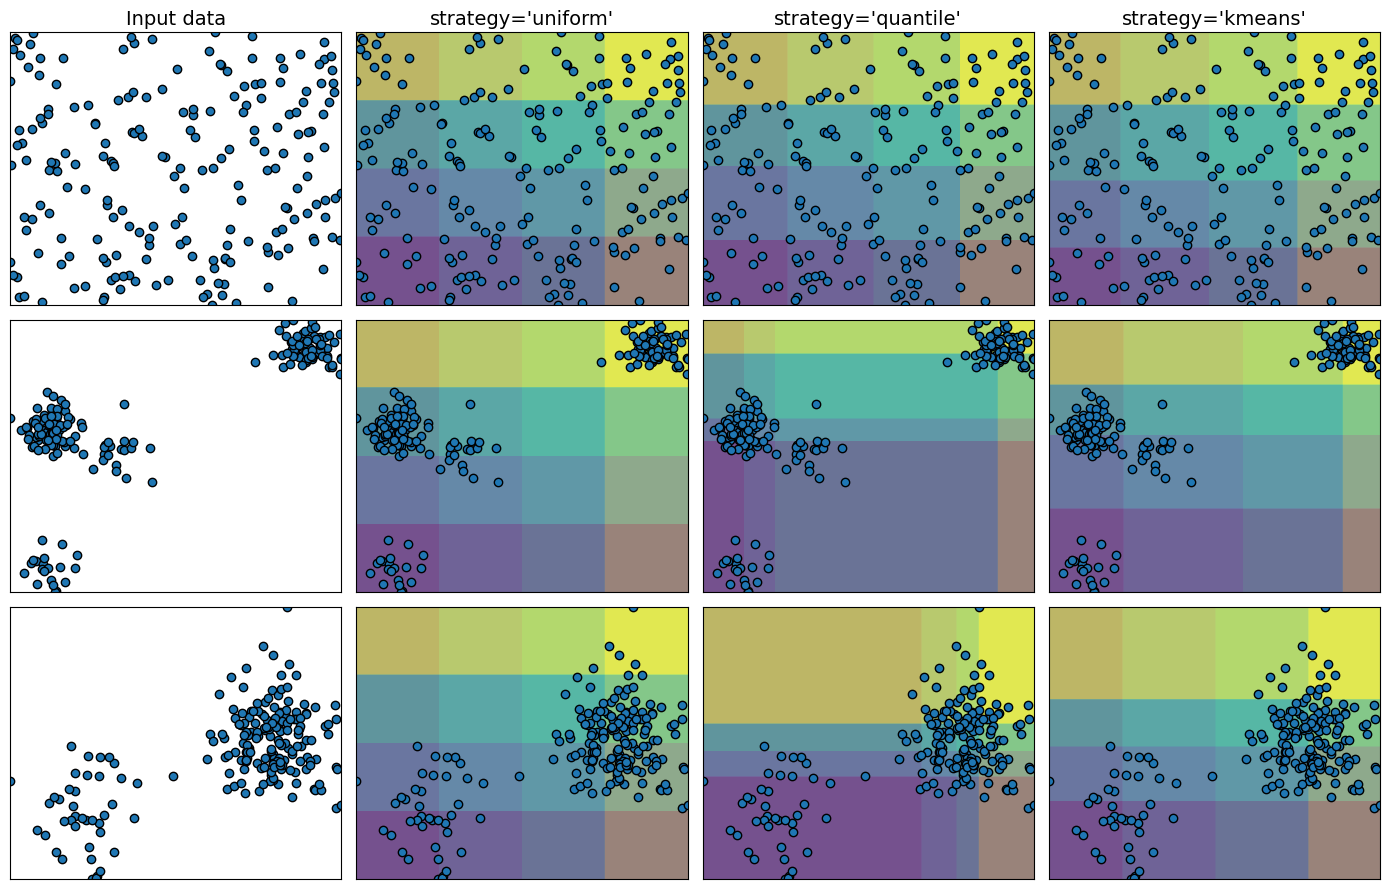

In [3]:
strategies = ["uniform", "quantile", "kmeans"]

figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=14)

        i += 1

plt.tight_layout()
plt.show()

# Visualize Results

We will now visualize the results of applying the different strategies to the datasets. The plots show the regions where the discretized encoding is constant.

# Summary

In this lab, we explored the different strategies available in the **KBinsDiscretizer** class of the Python scikit-learn library. We created three datasets and applied the three different strategies to each of them. We then visualized the results of the discretization.